In [32]:
import os
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

In [167]:
## Photoelectric

phot_filepath = '/Users/carmenromoluque/machine-learning-course/data_phot_images/'
phot_list     = []
for filename in os.listdir(phot_filepath):
    if filename.endswith('.npz'):
        my_file = phot_filepath+filename
        d = np.load(my_file, allow_pickle=True)
        for i in d['phot_images'][0]:
            print(i)
            phot_list.append(i.reshape(20,20))
phot_images = np.array(phot_list)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  3.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  3.  0.  4.  4.  8.  5.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  4.  3.  0.  0. 12.  9.  5.  5.  5.  0.  3.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  7.  7.  8.  5. 10.  7.  5.  3.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  7.  4.  3. 12. 21.  8.  9. 12.  7.  4.  0.  3.  0.  3.
   0.  0.]
 [ 0.  0.  0.  0.  0.  3.  9. 15. 33. 14. 17. 19.  6.  8.  3.  6.  5.  0.
   0.  0.]
 [ 0.  0.  0.  7.  0.  9.  8. 11. 30. 24. 21. 16. 12.  7.  3.  0.  3.  0.
   0.  0.]
 [ 0.  0.  0.  0.  5.  6.  6. 16. 38. 26. 23. 10. 19.  5.  5.  4.  4.  3.
   0.  3.]
 [ 0.  0.  0.  0.  6.  9.  9. 13. 33. 14. 17. 17.  9.  6.  0.  3.

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  6.  0.  5.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  3.  7. 10. 12.  4.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  6. 10. 18. 15. 28. 20. 14.  4.  3.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  7. 13. 27. 42. 47. 29. 13.  9.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  7. 25. 41. 68. 65. 47. 22.  9.  4.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  4.  7. 17. 32. 65. 55. 42. 22. 14.  3.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  9.  8. 11. 29. 35. 26. 18.  7.  0.  0.

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  3.  0.  4.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  4.  0.  0.  0.  4.  0.  5.  5.  0.  0.  0.  4.  0.  0.
   0.  0.]
 [ 0.  0.  0.  3.  0.  3.  3.  0.  3.  4.  0.  8.  0.  5.  4.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  3.  3.  0.  0.  5.  0.  8.  5.  8.  6.  6.  4.  8.  3.  0.
   0.  0.]
 [ 0.  0.  0.  0.  3.  0.  5.  5.  5.  9.  4.  8.  6.  6.  5.  6.  4.  0.
   0.  0.]
 [ 0.  3.  3.  0.  3.  7.  5.  9. 14. 11.  7. 12.  6.  7.  0.  9.  0.  0.
   0.  0.]
 [ 0.  0.  0.  3.  0.  4.  6. 11. 17. 19. 14. 15. 10. 10.  8.  8.  4.  0.
   0.  0.]
 [ 3.  0.  0.  0.  8.  5.  7. 11. 15. 23. 23. 13. 19.  3. 11.  6.  4.  0.
   0.  0.]
 [ 0.  6.  0.  0. 10.  3.  8.  5.  8. 12. 20. 26.  9. 12. 11.  6.  3.  0.
   0.  0.]
 [ 0.  0.  0.  0.  6.  5.  4.  8. 10. 17. 14. 13. 17. 14.  8.  0.

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  3.  3.  0.  3.  3.  3.  0.  0.  3.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  3.  0.  4.  0.  0.  0.  0.  6.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  6.  0.  8.  3.  3.  3.  0.  0.  0.  4.
   0.  0.]
 [ 0.  3.  0.  0.  4.  0.  0.  4.  6.  6.  5.  0.  9.  3.  0.  0.  0.  0.
   0.  0.]
 [ 0.  4.  0.  0.  7.  5.  3.  4.  5.  7.  7. 10.  4.  8.  4.  0.  0.  0.
   3.  0.]
 [ 0.  4.  0.  0.  4.  6.  0. 12.  5.  6.  7. 12.  9.  4.  5.  0.  0.  0.
   0.  0.]
 [ 0.  0.  3.  5.  0.  8.  8. 13. 11.  5. 20. 13.  7.  7.  6.  3.  3.  0.
   0.  0.]
 [ 0.  6.  4.  4.  6.  6.  9.  7. 11. 15. 14.  9.  9. 10.  5.  0.  0.  3.
   0.  0.]
 [ 0.  0.  0.  0.  3.  6. 11.  8. 15. 14. 12. 10.  4.  4.  8.  4.  7.  0.
   0.  3.]
 [ 0.  3.  4.  4.  4.  6.  8.  6. 12. 12. 16. 18.  8. 15.  5.  5.  0.  4.
   0.  0.]
 [ 3.  0.  0.  0.  5.  4. 10. 10.  9. 11.  8.  7.  8.  6.  0.  3.

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  5.  0.  4. 10.  4.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  5.  6.  7. 15. 16. 17. 11.  3.  3.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  3.  0. 11. 14. 15. 18. 27. 15.  8.  6.  4.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  7.  7.  6. 13. 19. 33. 45. 34. 20. 11.  0.  6.  3.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  7. 14. 17. 28. 48. 53. 35. 15. 11. 10.  4.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  6.  6.  8. 20. 29. 38. 31. 34. 19.  7.  9.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  3.  5.  6. 10. 19. 22. 25. 13. 11.  7.  6.  6.

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  7.  4.  6.  3.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  3.  4.  6.  5. 11.  7.  0.  0.  0.  3.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  3.  0.  4.  4.  7.  8. 10.  8.  8.  6.  4.  3.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  7.  7.  5. 12. 23. 16. 14. 12.  4.  3.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0. 11.  6. 11. 18. 26. 25. 23. 19. 13.  5.  8.  3.  0.
   0.  0.]
 [ 0.  0.  0.  6.  5. 11.  9. 16. 22. 29. 35. 26. 20. 15. 11.  7.  0.  5.
   0.  0.]
 [ 0.  0.  0.  0.  6.  4.  7. 16. 14. 23. 38. 33. 19. 17. 16.  5.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  5. 10.  6. 16. 18. 32. 36. 25. 16. 13.  7.  6.

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  3.  0.  0.  3.  0.  3.  3.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  3.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  5.  6.  4.  0.  0.  4.  0.  4.  3.  3.  3.  4.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  3.  0.  7.  4.  8.  3.  4.  5.  0.  0.  3.  0.  0.
   0.  0.]
 [ 0.  0.  3.  0.  7.  0.  4.  5.  9.  7. 12.  8.  0.  4.  3.  0.  3.  0.
   3.  0.]
 [ 3.  0.  0.  0.  4.  4.  8.  6.  5. 11. 13.  6. 10.  4.  3.  3.  3.  5.
   0.  0.]
 [ 0.  0.  3.  4.  6.  4.  7.  7. 11. 11. 18. 12.  7.  3.  0.  0.  6.  3.
   0.  0.]
 [ 0.  0.  5.  4.  4.  3.  8.  8. 13. 10.  6. 14.  6.  0.  6.  0.  4.  0.
   0.  3.]
 [ 0.  4.  4.  6.  0.  6. 11.  7. 13. 10. 13. 12.  9.  3.  6.  4.  0.  3.
   0.  0.]
 [ 0.  4.  0.  3. 10.  6. 10. 12.  7.  9.  9. 12.  9.  7.  4.  6.

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  3.  3.  3.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  5.  0.  3.  0.  0.  3.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  3.  5.  6.  0.  6.  6.  4.  5.  4.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  4.  0.  3.  0.  9.  6.  8. 12.  4.  8.  3.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  8.  8.  6. 13.  6. 11.  7.  5.  4.  9.  0.  0.
   0.  0.]
 [ 0.  0.  4.  6.  3.  6.  6. 16. 16. 14. 15. 19.  6.  8.  5.  3.  0.  0.
   0.  0.]
 [ 0.  3.  0.  0.  9.  9.  9. 16. 14. 23. 22. 13. 12.  9.  7.  4.  4.  0.
   0.  0.]
 [ 0.  3.  0.  0.  7. 16. 16. 10. 29. 27. 32. 22. 11. 12.  3.  3.  0.  0.
   3.  0.]
 [ 0.  0.  3.  4.  4.  7.  7. 13. 15. 30. 22. 18. 15.  5.  5.  4.

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  4.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  4.  7.  5.  4.  4.  0.  3.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  4.  3.  5.  7.  5.  7.  3.  4.  6.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  3.  0.  5. 11.  8. 10.  4.  6.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  4.  4.  5.  7. 24. 18. 14. 11.  8.  6.  3.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  5.  8. 14. 31. 19. 28.  8.  7.  4.  0.  6.  5.  0.
   0.  0.]
 [ 0.  0.  0.  3.  5.  6. 12. 10. 42. 28. 20. 21. 14.  6.  3.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  4.  5.  8.  6. 42. 27. 36. 24. 17.  5.  0.  3.  3.  0.
   0.  0.]
 [ 0.  0.  0.  0.  4.  5.  6. 10. 37. 24. 15. 13. 16.  6.  7.  5.

[[ 0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  3.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 3.  0.  0.  3.  0.  0.  0.  4.  3.  0.  3.  3.  0.  3.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  5.  0.  3.  5.  5.  4.  5.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 6.  0.  0.  3.  5.  5.  5.  7.  0.  7.  3.  4.  0.  3.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  9.  0.  7.  4.  3.  5.  4.  5.  3.  0.  5.  0.  3.  0.
   0.  0.]
 [ 0.  0.  4.  6.  8. 14.  7.  4.  7. 11.  5.  0.  0.  5.  0.  0.  0.  0.
   3.  0.]
 [ 3.  3.  6.  6.  8.  6.  5. 15. 10.  9.  5.  5.  0.  5.  0.  0.  0.  0.
   0.  0.]
 [ 0.  4.  7.  3.  7. 11. 10. 16. 10.  9.  7.  9.  5.  3.  5.  0.  0.  0.
   0.  0.]
 [ 5.  5.  5.  7. 11.  8. 13. 14.  9.  9. 13.  9.  0.  5.  6.  0.  0.  0.
   0.  0.]
 [ 3.  3.  4.  6. 11.  8. 11. 15. 17. 13. 12. 11.  8.  3.  0.  3.  4.  0.
   0.  0.]
 [ 0.  3.  3.  9. 11.  9.  5.  7. 10. 11.  6.  7.  5.  4.  0.  0.

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  3.  0.  0.  3.  4.  0.  0.  6.  4.  5.  3.  0.  0.  0.  3.  0.
   0.  0.]
 [ 0.  0.  0.  0.  5.  0.  0.  0.  3.  4.  4.  0.  0.  3.  0.  0.  3.  0.
   0.  0.]
 [ 0.  0.  0.  4.  4.  3.  6.  6.  3.  0.  4.  5.  5. 16.  6.  0.  0.  4.
   4.  0.]
 [ 0.  4.  3.  0.  4.  0.  5.  8. 11.  9.  6.  7.  0.  8.  7.  3.  5.  0.
   0.  0.]
 [ 3.  3.  4.  4.  5.  4.  0.  6.  9.  8. 16. 10.  8. 12.  5.  6.  3.  3.
   3.  3.]
 [ 0.  0.  4.  3.  3.  3.  5.  9.  9. 14. 15. 13. 15.  5.  8.  6.  0.  0.
   5.  0.]
 [ 0.  0.  6.  4.  8.  4.  7.  9.  8. 18.  9. 16.  4. 18.  3.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  6.  6. 12. 16. 18. 22. 10. 12. 15.  7.  3.  5.  3.
   4.  3.]
 [ 0.  3.  4.  0.  5.  5.  4.  5. 14. 12. 13. 16.  7. 12.  8.  6.

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  6.  3.  4.  4.  7.  3.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  3.  5.  4. 10.  7.  5.  7.  8.  5.  7.  3.  0.  3.  0.
   0.  0.]
 [ 0.  0.  0.  0.  3.  4.  8. 15. 14. 16.  7.  7. 10.  6.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  3.  0.  6. 11. 12. 11. 17. 24. 20.  7.  8.  4.  6.  5.  0.
   0.  0.]
 [ 0.  0.  0.  0.  9.  6. 19. 17. 31. 28. 37. 16. 17.  6.  4.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  4. 16. 31. 24. 49. 35. 27. 11.  8.  0.  0.  3.  0.
   0.  0.]
 [ 0.  0.  0.  0.  7.  9. 11. 17. 21. 31. 33. 24. 11.  6.  3.  4.

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  3.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  3.  7.  5.  3.  0.  0.  3.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  3.  0.  4.  5.  9.  5.  8.  4.  0.  0.  0.  0.  0.
   0.  0.]
 [ 0.  0.  0.  0.  0.  0.  8.  7.  8.  7.  8. 12.  4.  7.  4.  0.  3.  0.
   0.  0.]
 [ 0.  0.  0.  3.  3.  4.  9. 10. 10. 20. 14. 18. 10.  6.  5.  0.  0.  3.
   0.  0.]
 [ 0.  0.  3.  3.  5.  5. 13.  9. 30. 21. 26. 15. 17.  9.  5.  3.  0.  0.
   0.  0.]
 [ 0.  0.  0.  3.  8.  5. 12. 17. 27. 21. 27. 20. 12. 12.  9.  8.  0.  0.
   0.  0.]
 [ 0.  0.  0.  4.  0.  8. 20. 15. 33. 37. 26. 17. 18. 16.  4.  4.  0.  4.
   0.  0.]
 [ 0.  0.  0.  3.  4.  7. 14. 16. 23. 28. 29. 21. 17. 14. 10.  9.

In [169]:
len(phot_list)

97

In [148]:
phot_images[0][0].shape

(20, 20)

In [133]:
## Compton

compt_filepath = '/Users/carmenromoluque/machine-learning-course/data_compt_images/'
compt_list     = []
for filename in os.listdir(compt_filepath):
    if filename.endswith('.npz'):
        my_file = compt_filepath+filename
        d = np.load(my_file, allow_pickle=True)
        for im in d['compt_images']:
            compt_list.append(im)
compt_images = np.array(compt_list)

In [134]:
len(compt_images)

23423

### Store images in the same file

In [135]:
evt_file = '/Users/carmenromoluque/machine-learning-course/full_body_4cmdepth_all_images.npz'
np.savez(evt_file, phot_images=phot_images, compt_images=compt_images)

### How to load the data:

In [ ]:
phot_list, compt_list = [], []
data_file  = 'full_body_4cmdepth_all_images.npz'
data       = np.load(data_file, allow_pickle=True)
for im in data['phot_images']:
    if len(im)==0:
        continue
    phot_list .append(im.reshape(400)) #For the CNN we transform the matriz in a 1D array
for im in data['compt_images']:
    if len(im)==0:
        continue
    compt_list.append(im.reshape(400))
compt_images = np.array(compt_list)
phot_images  = np.array(phot_list)

In [143]:
phot_images[0].shape

(1, 20, 20)

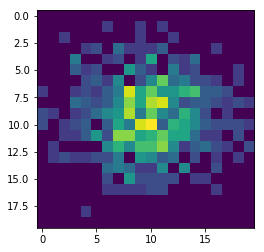

In [149]:
plt.imshow(compt_images[0][0]);